# Groundhog Day, an introduction

For the following assignment, the dataset of Groundhog Day is used from TidyTuesday. Different data manipulations, and methods will be used to make useful variables, interesting showcases and informative graphs:

- Create a dictionary, which includes id as primary key, and dictionary with other variables (such as name, pred. count etc) as its value.
- Make a function, which let you choose those groundhogs, which are real/fake
- Make a variable dataframe, which shows the TOP5 kind (type) of groundhogs
- Create 3 graphs:
    - Number of real groundhogs based on countries
    - Number of real groundhogs based on regions
    - Timeline of groundhogs

While some of these can be done more easily, for example using simple pandas commands, I want to show my skills and that we can get the same results in different ways.

# Import

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# Data

In [2]:
# importing the dataset

groundhogs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/groundhogs.csv')
predictions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/predictions.csv')

# only predictions after 1900

predictions = predictions.loc[predictions["year"] > 1900]

In [3]:
# creating a merged data

merged_gh = groundhogs.merge(predictions, on = "id")

# Codes

## Useful Dictionary

In [4]:
# Base: {id:{name:name,
#            sname:sname,
#            country:country,
#            predictions:predictions}}

# While .to_dict() already converts the whole data to dictionary, not all of them is needed,
# that's the reason why only a few of the variables have been chosen

Groundhog_Dict = {d["id"]:{"name":d["name"],
                            "sname":d["shortname"],
                            "country":d["country"],
                            "predictions":d["predictions_count"]} for d in groundhogs.to_dict(orient = "records")}

In [5]:
Groundhog_Dict

{1: {'name': 'Punxsutawney Phil',
  'sname': 'Phil',
  'country': 'USA',
  'predictions': 128},
 2: {'name': 'Octoraro Orphie',
  'sname': 'Orphie',
  'country': 'USA',
  'predictions': 91},
 3: {'name': 'Wiarton Willie',
  'sname': 'Willie',
  'country': 'Canada',
  'predictions': 60},
 4: {'name': 'Jimmy the Groundhog',
  'sname': 'Jimmy',
  'country': 'USA',
  'predictions': 55},
 5: {'name': 'Concord Charlie',
  'sname': 'Charlie',
  'country': 'USA',
  'predictions': 45},
 6: {'name': 'Buckeye Chuck',
  'sname': 'Chuck',
  'country': 'USA',
  'predictions': 40},
 7: {'name': 'General Beauregard Lee',
  'sname': 'Beau',
  'country': 'USA',
  'predictions': 40},
 8: {'name': 'French Creek Freddie',
  'sname': 'Freddie',
  'country': 'USA',
  'predictions': 35},
 9: {'name': 'Gertie the Groundhog',
  'sname': 'Gertie',
  'country': 'USA',
  'predictions': 30},
 10: {'name': 'Dunkirk Dave',
  'sname': 'Dave',
  'country': 'USA',
  'predictions': 28},
 11: {'name': 'Malverne Mel',
  's

With dictionary comprehension, we got a dictionary, which includes every groundhogs and their basic informations, like name or country. By declaring the id, in other words, the key, we can check that groundhog's informations

## Real Groundhog Function

In [6]:
def GH_Type(real = True): # Let the base be real groundhogs
        # use .loc[] to return real(True) or fake(False) rows
        return groundhogs.loc[groundhogs["is_groundhog"] == real]


In [7]:
# Let's check:
print(GH_Type()["is_groundhog"].value_counts())
print(GH_Type(real = False)["is_groundhog"].value_counts())

is_groundhog
True    32
Name: count, dtype: int64
is_groundhog
False    43
Name: count, dtype: int64


The code works, the first one only includes real groundhogs, and the second one only includes fake, because the "real" variable in the function is decleared to be "False". If someone wants to work with only real/fake data, then it is enough to use the function, decleare the "real", which is shorter than writing down the whole syntax (data.loc[] etc.).

## Show TOP 5 Groundhog Types

In [8]:
# groupby by the type, then show how many of them are with .aggregate("count")
# also sort based on the count column (id)
GHType = pd.concat([groundhogs.groupby(by = "type")["id"].aggregate("count")], axis = 1).sort_values("id", ascending = False)[:5]

In [9]:
GHType

,id
type,
Groundhog,32
Taxidermied groundhog,7
Person in a groundhog suit,6
Plush groundhog,4
Groundhog puppet,2


Here we can see the most used groundhogs. It seems 32 of the are real ordinary groundhogs, while the second most used type is taxidemied groundhogs, and so on.

# Graphs

## Number of real groundhogs based on countries

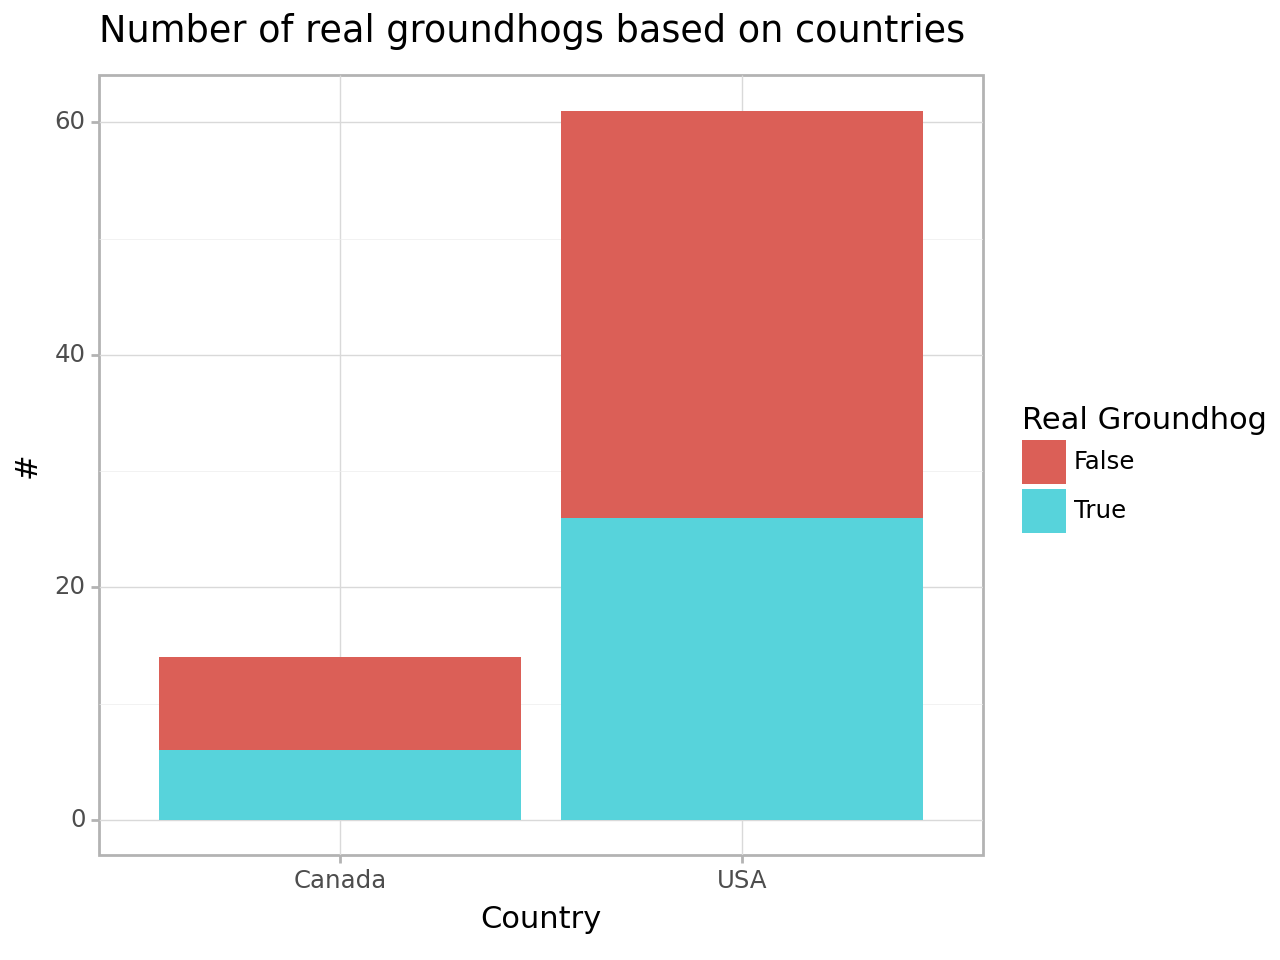

<Figure Size: (640 x 480)>

In [10]:
(
ggplot(groundhogs, aes(x = "country", fill = "is_groundhog")) +
  geom_bar(position = "stack") + 
  labs(x = "Country", y = "#", fill = "Real Groundhog", title = "Number of real groundhogs based on countries") +
  theme_light()
)

While relatively both countries have mostly fake groundhogs, overall the USA got much more groundhogs (any type), than Canada.

## Number of real groundhogs based on regions

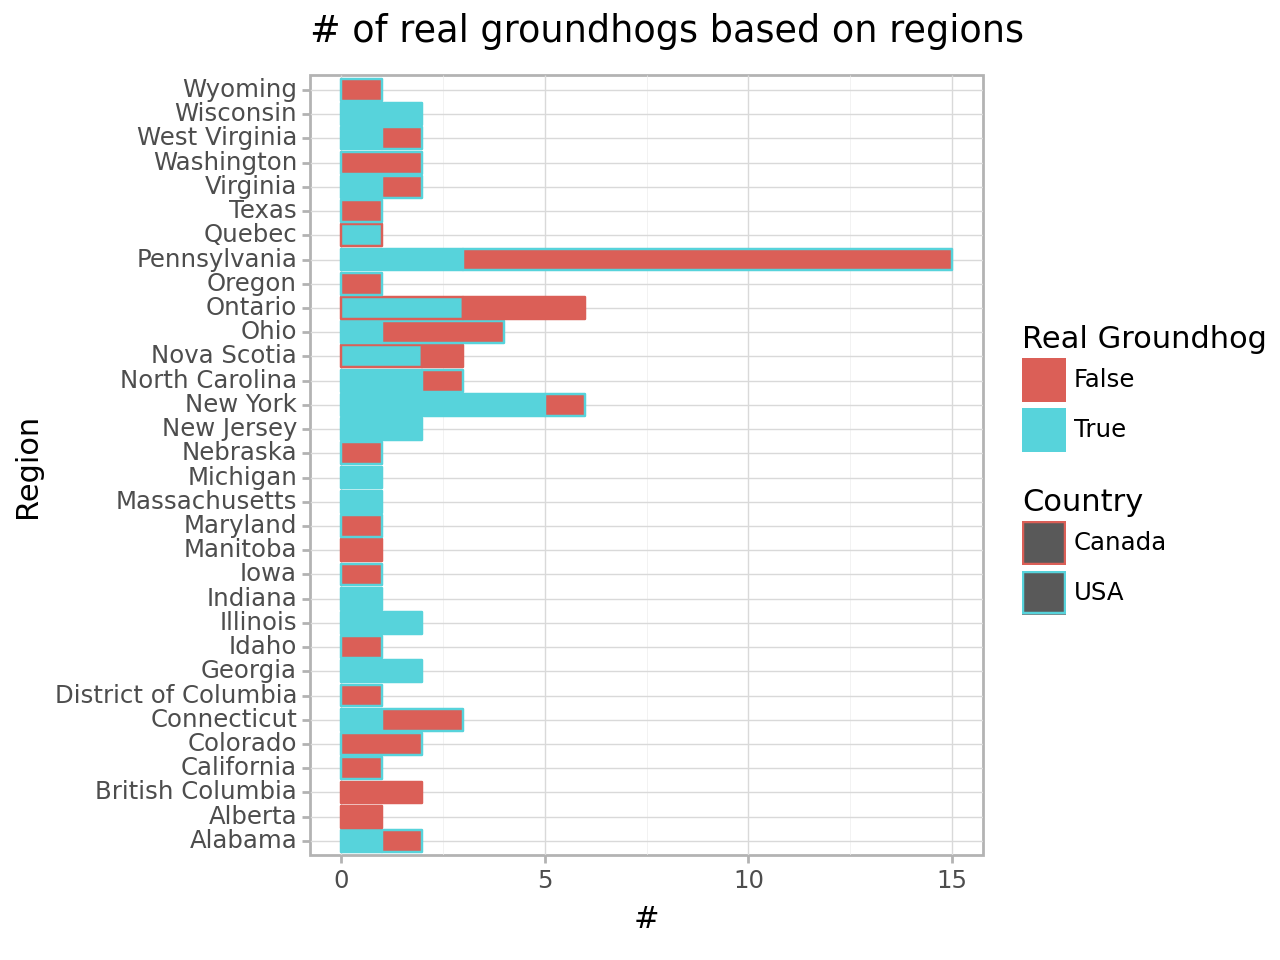

<Figure Size: (640 x 480)>

In [11]:
(
ggplot(groundhogs, aes("region", fill = "is_groundhog", color = "country")) +
  geom_bar(position = "stack") + 
  labs(x = "Region", y = "#",
       fill = "Real Groundhog",
       color = "Country",
       title = "# of real groundhogs based on regions") +
  theme_light() +
  coord_flip()
)

It is not a suprise, that the region with the most predictions (Pennsylvania) is based on the USA, but there are some Canadian regions, where the amount of predictions exceeds most of the USA regions.

## Groundhogs timeline

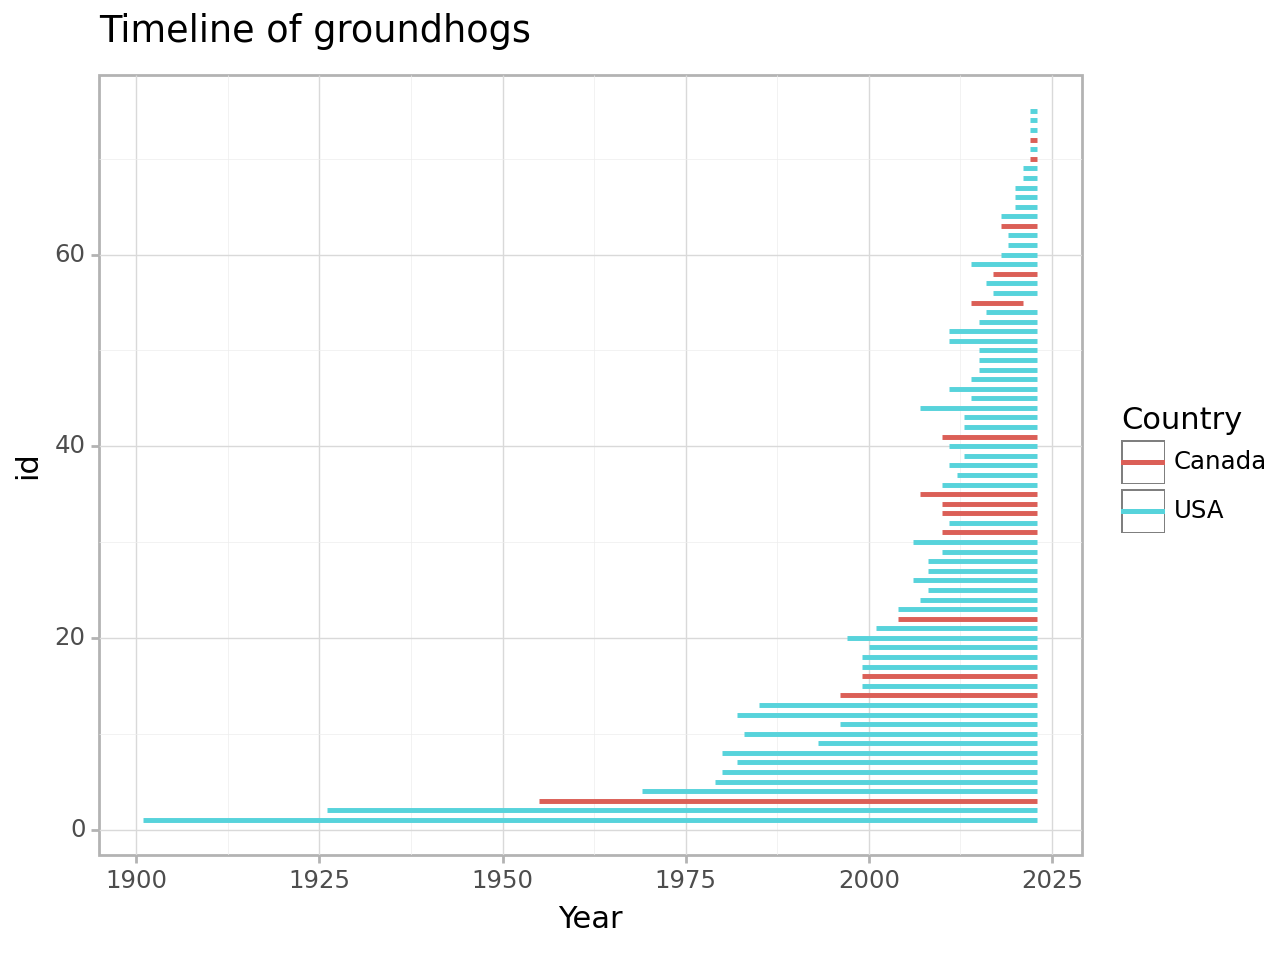

<Figure Size: (640 x 480)>

In [12]:
(
ggplot(merged_gh, aes("year","id", fill = "name", color = "country")) +
  geom_line(size = 1) +
  labs(x = "Year",
       color = "Country",
       title = "Timeline of groundhogs") +
  theme_light() +
  guides(fill = False)
)

From the timeline, it can be seen, that at the beginning there were only one groundhog. Later, mostly after 2000, the amount of groundhogs started to increase and most of them are only active for a couple of years yet.